In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from io import StringIO
import random 
import pickle
import os
from dotenv import load_dotenv

load_dotenv()

True

In [13]:
%pip install scipy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
import pandas as pd
from collections import Counter

# Load data from a text file
def load_data(file_path):
    """
    Reads a tab-delimited text file and loads it into a pandas DataFrame.
    Args:
        file_path (str): Path to the text file containing event data.
    Returns:
        pd.DataFrame: A pandas DataFrame with the event data.
    """
    with open(file_path, 'r') as file:
        # Read all lines from the file
        lines = file.readlines()
    
    # Split lines into columns using tab as the delimiter
    data = [line.strip().split("\t") for line in lines]
    
    # Create a DataFrame using the first row as headers
    return pd.DataFrame(data[1:], columns=data[0])

# Extract actor-recipient pairs
def extract_actor_recipient_pairs(df):
    """
    Extracts actor-recipient pairs from the DataFrame.
    Args:
        df (pd.DataFrame): DataFrame containing event data.
    Returns:
        pd.DataFrame: A DataFrame with actor-recipient pairs, excluding rows with missing values.
    """
    pairs = df.loc[:, ["Actor Name", "Recipient Name"]]  # Select only the relevant columns
    return pairs.dropna()  # Remove rows with missing values

# Count the frequency of each actor-recipient pair, excluding pairs with 'None'
def get_most_frequent_relations(df):
    """
    Counts the frequency of each actor-recipient pair, excluding relations with 'None'.
    Args:
        df (pd.DataFrame): DataFrame containing actor-recipient pairs.
    Returns:
        list: A list of tuples with actor-recipient pairs and their counts, sorted by frequency.
    """
    pairs = extract_actor_recipient_pairs(df)  # Get actor-recipient pairs
    
    # Convert DataFrame rows to a list of tuples (actor, recipient)
    pair_tuples = [
        (row["Actor Name"], row["Recipient Name"]) 
        for _, row in pairs.iterrows()
        if 'None' not in row["Actor Name"] and 'None' not in row["Recipient Name"]
    ]
    
    # Count occurrences of each pair
    pair_counts = Counter(pair_tuples)
    return pair_counts.most_common()  # Return pairs sorted by frequency

# Main execution block
if __name__ == "__main__":
    # Specify the path to the text file containing event data
    file_path = "events.txt"

    # Load the data into a DataFrame
    df = load_data(file_path)

    # Get the most frequent actor-recipient pairs
    most_frequent_relations = get_most_frequent_relations(df)

    # Print results
    print("Most Frequent Actor-Recipient Pairs (Excluding 'None' relations):")
    for pair, count in most_frequent_relations:
        print(f"{pair}: {count} occurrences")


Most Frequent Actor-Recipient Pairs (Excluding 'None' relations):
('Enforcement Directorate', 'Arvind Kejriwal'): 134 occurrences
('Federal Railroad Police', 'Jair Bolsonaro'): 123 occurrences
('Narendra Modi', 'Congee'): 88 occurrences
('Houthi movement', 'Houthi movement'): 71 occurrences
('Bharatiya Janata Party', 'Congee'): 70 occurrences
('Delhi High Court', 'Arvind Kejriwal'): 68 occurrences
('Joe Biden', 'Benjamin Netanyahu'): 64 occurrences
('Benjamin Netanyahu', 'Hama'): 59 occurrences
('Congee', 'Bharatiya Janata Party'): 58 occurrences
('Benny Gantz', 'Benjamin Netanyahu'): 48 occurrences
('Rahul Gandhi', 'Narendra Modi'): 47 occurrences
('Javier Milei', 'Pedro Sánchez'): 43 occurrences
('Vladimir Putin', 'Vladimir Putin'): 41 occurrences
('Mallikarjun Kharge', 'Narendra Modi'): 39 occurrences
('Akhilesh Yadav', 'Bharatiya Janata Party'): 38 occurrences
('Enforcement Directorate', 'Hemant Soren'): 37 occurrences
('Corrupt Practices Investigation Bureau', 'S. Iswaran'): 37 oc

In [15]:
import pandas as pd
from collections import Counter

# Load data from a text file
def load_data(file_path):
    """
    Reads a tab-delimited text file and loads it into a pandas DataFrame.
    Args:
        file_path (str): Path to the text file containing event data.
    Returns:
        pd.DataFrame: A pandas DataFrame with the event data.
    """
    with open(file_path, 'r') as file:
        # Read all lines from the file
        lines = file.readlines()
    
    # Split lines into columns using tab as the delimiter
    data = [line.strip().split("\t") for line in lines]
    
    # Create a DataFrame using the first row as headers
    return pd.DataFrame(data[1:], columns=data[0])

# Extract actor-recipient pairs
def extract_actor_recipient_pairs(df):
    """
    Extracts actor-recipient pairs from the DataFrame.
    Args:
        df (pd.DataFrame): DataFrame containing event data.
    Returns:
        pd.DataFrame: A DataFrame with actor-recipient pairs, excluding rows with missing values.
    """
    pairs = df.loc[:, ["Actor Name", "Recipient Name"]]  # Select only the relevant columns
    return pairs.dropna()  # Remove rows with missing values

# Count the frequency of each actor-recipient pair, excluding pairs with 'None'
def get_most_frequent_relations(df):
    """
    Counts the frequency of each actor-recipient pair, excluding relations with 'None'.
    Args:
        df (pd.DataFrame): DataFrame containing actor-recipient pairs.
    Returns:
        dict: A dictionary of actor-recipient pairs with their counts.
    """
    pairs = extract_actor_recipient_pairs(df)  # Get actor-recipient pairs
    
    # Convert DataFrame rows to a list of tuples (actor, recipient)
    pair_tuples = [
        (row["Actor Name"], row["Recipient Name"]) 
        for _, row in pairs.iterrows()
        if 'None' not in row["Actor Name"] and 'None' not in row["Recipient Name"]
    ]
    
    # Count occurrences of each pair
    pair_counts = Counter(pair_tuples)
    return pair_counts  # Return a dictionary of pair counts

# Filter the DataFrame for pairs with 15+ occurrences
def filter_pairs_by_occurrence(df, pair_counts, min_count=30):
    """
    Filters the DataFrame for actor-recipient pairs that occur 15+ times.
    Args:
        df (pd.DataFrame): Original DataFrame containing event data.
        pair_counts (dict): Dictionary of actor-recipient pairs with their counts.
        min_count (int): Minimum count for the pair to be included in the result.
    Returns:
        pd.DataFrame: A filtered DataFrame with only pairs having 15+ occurrences.
    """
    # Get the pairs that occur at least `min_count` times
    valid_pairs = {pair for pair, count in pair_counts.items() if count >= min_count}
    
    # Filter the original DataFrame to include only these pairs
    filtered_df = df[df.apply(
        lambda row: (row["Actor Name"], row["Recipient Name"]) in valid_pairs, axis=1)]
    
    return filtered_df

# Main execution block
if __name__ == "__main__":
    # Specify the path to the text file containing event data
    file_path = "events.txt"

    # Load the data into a DataFrame
    df = load_data(file_path)

    # Get the actor-recipient pair counts
    pair_counts = get_most_frequent_relations(df)

    # Filter the DataFrame to include only pairs with 15+ occurrences
    filtered_df = filter_pairs_by_occurrence(df, pair_counts, min_count=15)

    # Print the filtered DataFrame
    #print("Filtered DataFrame with actor-recipient pairs that have 15+ occurrences:")
    filtered_df.head()


In [16]:
# Save the graph using pickle
with open('newgraph.pkl', 'wb') as f:
    pickle.dump(G, f)

In [17]:
with open('newgraph.pkl', 'rb') as f:
    G = pickle.load(f)

In [18]:
len(filtered_df)

2564

In [9]:
import pandas as pd
from collections import Counter

# Load data from a text file
def load_data(file_path):
    """
    Reads a tab-delimited text file and loads it into a pandas DataFrame.
    Args:
        file_path (str): Path to the text file containing event data.
    Returns:
        pd.DataFrame: A pandas DataFrame with the event data.
    """
    with open(file_path, 'r') as file:
        # Read all lines from the file
        lines = file.readlines()
    
    # Split lines into columns using tab as the delimiter
    data = [line.strip().split("\t") for line in lines]
    
    # Create a DataFrame using the first row as headers
    return pd.DataFrame(data[1:], columns=data[0])

# Extract actor-recipient pairs
def extract_actor_recipient_pairs(df):
    """
    Extracts actor-recipient pairs from the DataFrame.
    Args:
        df (pd.DataFrame): DataFrame containing event data.
    Returns:
        pd.DataFrame: A DataFrame with actor-recipient pairs, excluding rows with missing values.
    """
    pairs = df.loc[:, ["Actor Name", "Recipient Name", "Event Date"]]  # Select relevant columns
    return pairs.dropna()  # Remove rows with missing values

# Count the frequency of each actor-recipient pair, excluding pairs with 'None'
def get_most_frequent_relations(df):
    """
    Counts the frequency of each actor-recipient pair, excluding relations with 'None'.
    Args:
        df (pd.DataFrame): DataFrame containing actor-recipient pairs.
    Returns:
        dict: A dictionary of actor-recipient pairs with their counts.
    """
    pairs = extract_actor_recipient_pairs(df)  # Get actor-recipient pairs
    
    # Convert DataFrame rows to a list of tuples (actor, recipient)
    pair_tuples = [
        (row["Actor Name"], row["Recipient Name"]) 
        for _, row in pairs.iterrows()
        if 'None' not in row["Actor Name"] and 'None' not in row["Recipient Name"]
    ]
    
    # Count occurrences of each pair
    pair_counts = Counter(pair_tuples)
    return pair_counts  # Return a dictionary of pair counts

# Filter the DataFrame for pairs with 50+ occurrences
def filter_pairs_by_occurrence(df, pair_counts, min_count=30):
    """
    Filters the DataFrame for actor-recipient pairs that occur 50+ times.
    Args:
        df (pd.DataFrame): Original DataFrame containing event data.
        pair_counts (dict): Dictionary of actor-recipient pairs with their counts.
        min_count (int): Minimum count for the pair to be included in the result.
    Returns:
        pd.DataFrame: A filtered DataFrame with only pairs having 50+ occurrences.
    """
    # Get the pairs that occur at least `min_count` times
    valid_pairs = {pair for pair, count in pair_counts.items() if count >= min_count}
    
    # Filter the original DataFrame to include only these pairs
    filtered_df = df[df.apply(
        lambda row: (row["Actor Name"], row["Recipient Name"]) in valid_pairs, axis=1)]
    
    return filtered_df

# Sort by date and split the last 5 relations as test, rest as train
def split_by_date(df, date_column):
    """
    For each relation type (actor-recipient pair), sort by date and split the last 5 as test.
    Args:
        df (pd.DataFrame): DataFrame with actor-recipient pairs and event dates.
        date_column (str): The column with the event date.
    Returns:
        pd.DataFrame, pd.DataFrame: The train and test DataFrames.
    """
    # Convert the date column to datetime if it's not already
    df[date_column] = pd.to_datetime(df[date_column])
    
    # List to hold train and test data
    train_data = []
    test_data = []
    
    # Group by actor-recipient pairs
    grouped = df.groupby(["Actor Name", "Recipient Name"])
    
    for (actor, recipient), group in grouped:
        # Sort the group by date
        group = group.sort_values(by=date_column)
        
        # Split the last 5 relations as the test set
        test_data.append(group.tail(5))
        
        # All other relations are used for the train set
        train_data.append(group.head(len(group) - 5))
    
    # Concatenate all train and test data
    train_df = pd.concat(train_data)
    test_df = pd.concat(test_data)
    
    return train_df, test_df

# Main execution block
if __name__ == "__main__":
    # Specify the path to the text file containing event data
    file_path = "events.txt"

    # Load the data into a DataFrame
    df = load_data(file_path)

    # Get the most frequent actor-recipient pairs
    pair_counts = get_most_frequent_relations(df)

    # Filter the DataFrame for pairs that occur 50+ times
    filtered_df = filter_pairs_by_occurrence(df, pair_counts, min_count=50)

    # Split the data by date, keeping the last 5 events for each relation as test
    train_df, test_df = split_by_date(filtered_df, "Event Date")


/var/folders/9m/hdnmjb2s317bp4hpkl0_4qmh0000gn/T/ipykernel_10694/3011837177.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = pd.to_datetime(df[date_column])


In [10]:
print("Training Data:")
train_df.head()['Recipient Name']  # Show the first few rows of the training data

Training Data:


162805    Hama
164449    Hama
154171    Hama
141143    Hama
141110    Hama
Name: Recipient Name, dtype: object

In [11]:
train_df['Event Type'].value_counts()

Event Type
ACCUSE      290
THREATEN     80
COERCE       78
SANCTION     59
REQUEST      57
ASSAULT      46
RETREAT      21
CONCEDE      20
MOBILIZE     19
PROTEST      18
CONSULT       1
AID           1
Name: count, dtype: int64

In [ ]:
print("\nTest Data:")
test_df[test_df['Recipient Name']=='Arvind Kejriwal'][test_df['Actor Name']=='Delhi High Court'] # Show the first few rows of the test data

In [30]:

print("\nTest Data:")
test_df[test_df['Recipient Name']=='Arvind Kejriwal'][test_df['Actor Name']=='Delhi High Court'] # Show the first few rows of the test data


Test Data:


/var/folders/9m/hdnmjb2s317bp4hpkl0_4qmh0000gn/T/ipykernel_10694/2674556816.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_df[test_df['Recipient Name']=='Arvind Kejriwal'][test_df['Actor Name']=='Delhi High Court'] # Show the first few rows of the test data


,Event ID,Event Date,Event Type,Event Mode,Event Intensity,Quad Code,Contexts,Actor Name,Actor Country,Actor COW,...,GeoNames ID,Raw Placename,Feature Type,Source,Publication Date,Story People,Story Organizations,Story Locations,Language,Version
185391,20240625-3626-515bfd1c9ad2_RETREAT_release,2024-06-25,RETREAT,release,6.50,MATERIAL COOPERATION,None,Delhi High Court,India,750,...,None,,None,Hindustan Times,2024-06-25,Manoj Misra | Arvind Kejriwal | Kejriwal,the Supreme Court | HC | AAP | Aam Aadmi Party...,Delhi | Dili,English,NGEC_coder-Vers001-b1-Run-001
186226,20240626-7129-e57b638e7f33_RETREAT_release,2024-06-26,RETREAT,release,6.50,MATERIAL COOPERATION,None,Delhi High Court,India,750,...,None,jail,None,Hindustan Times,2024-06-26,Manoj Misra | Arvind Kejriwal | Kejriwal,the Supreme Court | HC | AAP | Aam Aadmi Party...,Delhi | Dili,English,NGEC_coder-Vers001-b1-Run-001
186971,20240626-1400-85cfde6278b5_RETREAT,2024-06-26,RETREAT,None,6.50,MATERIAL COOPERATION,None,Delhi High Court,India,750,...,None,Delhi,None,Hindustan Times,2024-06-26,Amitabh Rawat | Arvind Kejriwal | Kejriwal,Hindustan Times | CBI | HT Digital Content Ser...,Red Sea | Delhi,English,NGEC_coder-Vers001-b1-Run-001
190397,20240629-3187-3e2093b16267_ACCUSE,2024-06-29,ACCUSE,None,-3.00,VERBAL CONFLICT,None,Delhi High Court,India,750,...,1273294,Delhi,PPLA,Hindustan Times,2024-06-29,Chaudhary | Vikram Chaudhary | Arvind Kejriwal...,the Supreme Court | CBI | the Central Bureau o...,Delhi,English,NGEC_coder-Vers001-b1-Run-001
190418,20240629-2191-f8b4603e87eb_ACCUSE,2024-06-29,ACCUSE,None,-3.00,VERBAL CONFLICT,None,Delhi High Court,India,750,...,1273294,Delhi,PPLA,Hindustan Times,2024-06-29,Chaudhary | Vikram Chaudhary | Arvind Kejriwal...,the Supreme Court | CBI | the Central Bureau o...,Delhi,English,NGEC_coder-Vers001-b1-Run-001


In [40]:
train_df['Event Date'] = train_df['Event Date'].apply(lambda x: x.strftime("%Y-%m-%d") if isinstance(x, pd.Timestamp) else x)


/Users/vedanthaggarwal/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36335 (\N{CJK UNIFIED IDEOGRAPH-8DEF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vedanthaggarwal/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36879 (\N{CJK UNIFIED IDEOGRAPH-900F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vedanthaggarwal/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31038 (\N{CJK UNIFIED IDEOGRAPH-793E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vedanthaggarwal/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/vedanthaggarwal/Library/Python/3.12/lib/python/site-packa

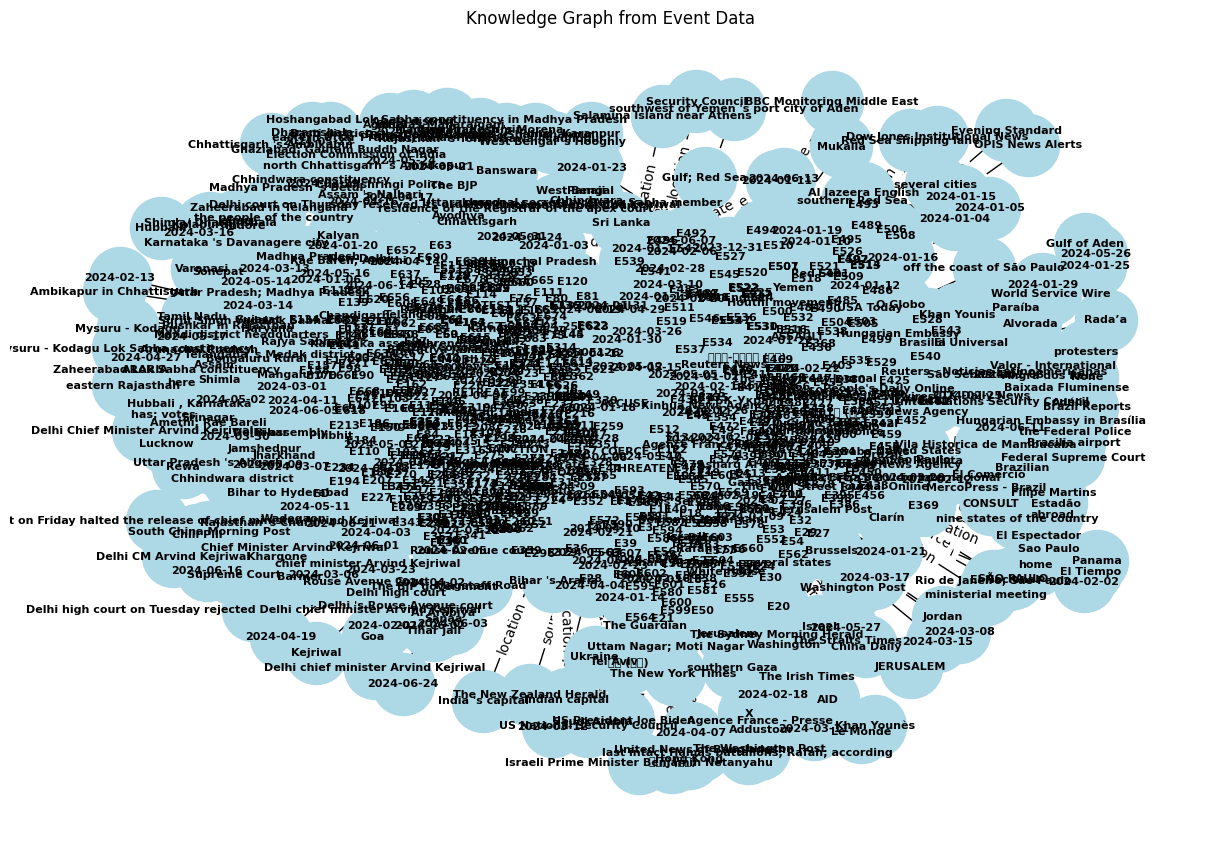

In [41]:
# Create a directed graph
#G = nx.DiGraph()
G = nx.Graph()

n = 1
# Function to add nodes and edges
def add_event_to_graph(row,n):

    # Date
    date = row['Event Date']
    G.add_node(date)

    event_id = F"E{n}"
    
    event_date = row['Event Date']
    event_type = row['Event Type']
    event_intensity = row['Event Intensity']
    quad_code = row['Quad Code']
    contexts = row['Contexts']
    
    G.add_node(event_type)
    # Create an event node
    G.add_node(event_id, event_date=event_date, event_type=event_type,event_intensity=event_intensity,quad_code=quad_code,contexts=contexts)

    # Add actor nodes with attributes
    actor = row['Actor Name']
    if actor == '':
        actor=row['Actor Country'] # Actor Name	Actor Country	Actor COW	Primary Actor Sector	Actor Sectors	Actor Title	Actor Name Raw	Wikipedia Actor ID
    G.add_node(actor, country=row['Actor Country'],cow=row['Actor COW'], primary_sector=row['Primary Actor Sector'],sectors=row['Actor Sectors'],title=row['Actor Title'],id=row['Wikipedia Actor ID'], actor_type='actor') 

    # Add recipient nodes with attributes
    recipient = row['Recipient Name'] # Recipient Name	Recipient Country	Recipient COW	Primary Recipient Sector	Recipient Sectors	Recipient Title	Recipient Name Raw	Wikipedia Recipient ID
    G.add_node(recipient, country=row['Recipient Country'], cow=row['Recipient COW'], primary_sector=row['Primary Recipient Sector'],sectors=row['Recipient Sectors'],title=row['Recipient Title'],id=row['Wikipedia Recipient ID'],actor_type='recipient')

    #Location node Placename	City	District	Province	Country	Latitude	Longitude	GeoNames ID	Raw Placename	Feature Type	Source	Publication Date	Story People	Story Organizations	Story Locations	Language	Version
    place = row['Raw Placename']
    G.add_node(place,city=row['City'],district=row['District'],province=row['Province'],latitude=row['Latitude'],longitude=row['Longitude'],geoid=row['GeoNames ID'],raw=row['Raw Placename'])

    # Add information source node
    info_source = row['Source']
    G.add_node(info_source, publication_date=row['Publication Date'],feature=row['Feature Type'], date=row['Publication Date'],people=row['Story People'],organization=row['Story Organizations'],location=row['Story Locations'],language=row['Language'], type='source')

    # Add edges between nodes
    G.add_edge(event_id,event_type,relation='type')
    G.add_edge(event_id,date,relation='date')
    G.add_edge(event_id, actor, relation='actor')
    G.add_edge(event_id, recipient, relation='recipient')
    G.add_edge(event_id, place, relation='location')
    G.add_edge(event_id, info_source, relation='source')

# Iterate over each row to build the graph
for index, row in train_df.iterrows():
    add_event_to_graph(row,n)
    n+=1

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Layout for the nodes
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=8, font_color='black', font_weight='bold', arrows=True)

# Draw edge labels (optional)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Set the title and show the plot
plt.title('Knowledge Graph from Event Data')
plt.show()

In [42]:
# Save the graph using pickle
with open('newgraph.pkl', 'wb') as f:
    pickle.dump(G, f)

In [43]:
# Save the graph using pickle
with open('newgraph.pkl', 'rb') as f:
    G = pickle.load(f)

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from io import StringIO
import random 
import pickle
import os
from dotenv import load_dotenv

load_dotenv()


True

In [48]:
import requests
import datetime
import os
import pandas as pd
import networkx as nx
from groq import Groq

# Initialize the Groq client with your API key
client = Groq(api_key=os.getenv("GROQ_API_KEY"))

# Search for News Articles
def search_news(actor, recipient):
    query = f"{actor} AND {recipient}"
    api_key = "fb8156f456be4094b9e88dd55b1d29fa" #os.getenv("NEWS_API_KEY")
    url = f"https://newsapi.org/v2/everything?q={query}&sortBy=publishedAt&apiKey={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        articles = response.json().get('articles', [])
        return [{"title": article['title'], "content": article['description'], "url": article['url']} for article in articles]
    else:
        print("Error fetching news articles.")
        return []

# Extract Node and Edge Connections
def get_node_edge_connections(graph, actor, recipient, date):
    relevant_edges = []
    relevant_nodes = set()
    for u, v, data in graph.edges(data=True):
        if (actor in [u, v] or recipient in [u, v]) and data.get('relation') == 'event':
            event_date = graph.nodes[u].get('event_date', graph.nodes[v].get('event_date'))
            if event_date and datetime.datetime.strptime(event_date, "%Y-%m-%d") < datetime.datetime.strptime(date, "%Y-%m-%d"):
                relevant_edges.append((u, v, data))
                relevant_nodes.add(u)
                relevant_nodes.add(v)
    return relevant_nodes, relevant_edges

# Output All Node Attributes and Summaries
def print_node_attributes(graph, nodes):
    node_data = {}
    for node in nodes:
        node_data[node] = graph.nodes[node]
    return node_data

# Calculate Frequency of Event Types
def calculate_event_type_frequency(graph, actor, recipient, date):
    event_counts = {}
    for u, v, data in graph.edges(data=True):
        if (actor in [u, v] or recipient in [u, v]):
            event_date = graph.nodes[u].get('event_date', graph.nodes[v].get('event_date'))
            if event_date and datetime.datetime.strptime(event_date, "%Y-%m-%d") < datetime.datetime.strptime(date, "%Y-%m-%d"):
                event_type = graph.nodes[u].get('event_type', graph.nodes[v].get('event_type'))
                if event_type:
                    event_counts[event_type] = event_counts.get(event_type, 0) + 1
    return event_counts

# Query Groq LLM for Prediction
def query_groq_for_prediction(actor, recipient, date, event_frequencies, node_attributes):
    prompt = f"""
You are a knowledge graph analysis expert. Based on the following data, predict the most likely event type between '{actor}' and '{recipient}' on '{date}'.

Event Frequency:
{event_frequencies}

Node Attributes:
{node_attributes}

Choose the most likely event type from the following list:
ACCUSE, THREATEN, COERCE, SANCTION, REQUEST, ASSAULT, RETREAT, CONCEDE, MOBILIZE, PROTEST, CONSULT, AID
"""
    try:
        chat_completion = client.chat.completions.create(
            messages=[{"role": "user", "content": prompt}],
            model="llama3-8b-8192",
        )
        return chat_completion.choices[0].message.content
    except Exception as e:
        print(f"Error querying Groq API: {e}")
        return None

# Main Function
def predict_event_type(graph, df, actor, recipient, date):
    # Step 1: Fetch news articles
    articles = search_news(actor, recipient)
    print("Latest News Articles:")
    for article in articles[:5]:
        print(f"Title: {article['title']}\nContent: {article['content']}\nURL: {article['url']}\n")

    # Step 2: Extract nodes and edges
    nodes, edges = get_node_edge_connections(graph, actor, recipient, date)
    print("Nodes and Edges Extracted.")

    # Step 3: Output node attributes
    node_attributes = print_node_attributes(graph, nodes)
    print(f"Node Attributes: {node_attributes}")

    # Step 4: Calculate event type frequency
    event_frequencies = calculate_event_type_frequency(graph, actor, recipient, date)
    print(f"Event Type Frequencies: {event_frequencies}")

    # Step 5: Query Groq LLM for prediction
    prediction = query_groq_for_prediction(actor, recipient, date, event_frequencies, node_attributes)
    print(f"Predicted Event Type: {prediction}")


In [49]:
predict_event_type(G,train_df,'Arvind Kejriwal','Delhi High Court','2024-06-25')

Latest News Articles:
Title: Delhi Police traces accused behind bomb threat email to Paschim Vihar School
Content: Delhi Police apprehended a student who sent a bomb threat email to his own school in Paschim Vihar. The student confessed and was counseled, unrelated to the series of threats sent to other Delhi schools on Friday. These other threats, demanding ransom and in…
URL: https://economictimes.indiatimes.com/news/india/delhi-police-traces-accused-behind-bomb-threat-email-to-paschim-vihar-school/articleshow/116309022.cms

Title: Several Delhi schools receive fresh bomb threats, day after similar alerts
Content: Several Delhi schools, including DPS RK Puram and Ryan International, received bomb threat emails for the second consecutive day. The emails, purportedly from "Barry Allah," warned of attacks if demands weren't met. Police, bomb squads, and fire officials inv…
URL: https://economictimes.indiatimes.com/news/india/several-delhi-schools-receive-fresh-bomb-threats-day-after-sim

In [34]:
import requests
import json
import datetime
import os
import random
from groq import Groq

# Initialize the Groq client with your API key
client = Groq(api_key=os.getenv("GROQ_API_KEY"))

# Function to get relevant events before a specific date from the train dataset
def get_events_before_date(df, actor, recipient, date):
    date = datetime.datetime.strptime(date, "%Y-%m-%d")
    relevant_events = []

    # Filter rows where the actor and recipient are involved, and the event is before the specified date
    df_filtered = df[(df["Actor Name"] == actor) | (df["Recipient Name"] == recipient)]
    df_filtered = df_filtered[df_filtered["Event Date"] < date]

    for _, row in df_filtered.iterrows():
        relevant_events.append({
            "event_date": row["Event Date"],
            "event_type": row["Event Type"],
            "quad_code": row["Quad Code"],
            "contexts": row["Contexts"],
            #"summary": row["Summary"],
            "actor": row["Actor Name"],
            "recipient": row["Recipient Name"]
        })

    return relevant_events

# Function to interact with the Groq API
def query_groq(prompt):
    try:
        # Call the Groq API to generate a summary
        chat_completion = client.chat.completions.create(
            messages=[{"role": "user", "content": prompt}],
            model="llama3-8b-8192",
        )
        return chat_completion.choices[0].message.content
    except Exception as e:
        print(f"Error querying Groq API: {e}")
        return None

# Main function to predict relations
def predict_relations_with_llm(df, actor, recipient, date):
    # Step 1: Gather relevant events from the train dataset
    events = get_events_before_date(df, actor, recipient, date)[:20]

    if not events:
        print(f"No relevant events found for {actor} and {recipient} before {date}.")
        return

    # Step 2: Prepare a structured prompt for the LLM
    event_details = "\n".join(
        [
            f"Event Date: {event['event_date']}, Event Type: {event['event_type']}, Quad Code: {event['quad_code']}, "
            f"Contexts: {event['contexts']}, Summary: NA, Actor: {event['actor']}, "
            f"Recipient: {event['recipient']}"
            for event in events
        ]
    )
    print(event_details)

    prompt = f"""
You are a knowledge graph analysis expert. Based on the following event data, predict the top 3 possible relations between the actor '{actor}' and the recipient '{recipient}' before the date '{date}' by considering all the event information.

CHOOSE BETWEEN ONLY THE FOLLOWING EVENT TYPES:
ACCUSE      
THREATEN     
COERCE       
SANCTION    
REQUEST      
ASSAULT      
RETREAT      
CONCEDE      
MOBILIZE     
PROTEST      
CONSULT       
AID 
----------
Event Details:
{event_details}

"""

    # Step 3: Query the Groq API
    print("\nQuerying Groq API for predictions...\n")
    prediction = query_groq(prompt)

    # Step 4: Output the results
    if prediction:
        print(f"Predicted Relations:\n{prediction}")
    else:
        print("Failed to retrieve predictions from the Groq API.")

# Example of how to use the function
if __name__ == "__main__":
    # Load your dataframe (assuming it's already loaded as 'df')
    file_path = "events.csv"
    df = train_df

    # Define the actor, recipient, and the specific date
    actor = "Delhi High Court"
    recipient = "Arvind Kejriwal"
    date = "2024-06-25"

    # Predict the relations
    predict_relations_with_llm(df, actor, recipient, date)


Event Date: 2024-02-05 00:00:00, Event Type: ACCUSE, Quad Code: VERBAL CONFLICT, Contexts: health , Summary: NA, Actor: Delhi High Court, Recipient: Arvind Kejriwal
Event Date: 2024-02-05 00:00:00, Event Type: ACCUSE, Quad Code: VERBAL CONFLICT, Contexts: None, Summary: NA, Actor: Delhi High Court, Recipient: Arvind Kejriwal
Event Date: 2024-02-07 00:00:00, Event Type: THREATEN, Quad Code: VERBAL CONFLICT, Contexts: None, Summary: NA, Actor: Delhi High Court, Recipient: Arvind Kejriwal
Event Date: 2024-02-07 00:00:00, Event Type: REQUEST, Quad Code: VERBAL CONFLICT, Contexts: None, Summary: NA, Actor: Delhi High Court, Recipient: Arvind Kejriwal
Event Date: 2024-02-08 00:00:00, Event Type: SANCTION, Quad Code: MATERIAL CONFLICT, Contexts: None, Summary: NA, Actor: Delhi High Court, Recipient: Arvind Kejriwal
Event Date: 2024-02-08 00:00:00, Event Type: ACCUSE, Quad Code: VERBAL CONFLICT, Contexts: None, Summary: NA, Actor: Delhi High Court, Recipient: Arvind Kejriwal
Event Date: 2024-0